# Bootcamp Engenheiro(a) de Machine Learning

## Módulo 3 - Seleção de Modelos de Machine Learning

## Blood Transfusion Service Center

In [24]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix


In [3]:
# Data Reading

df = pd.read_csv('bloodtransf.csv')


,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


None

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64


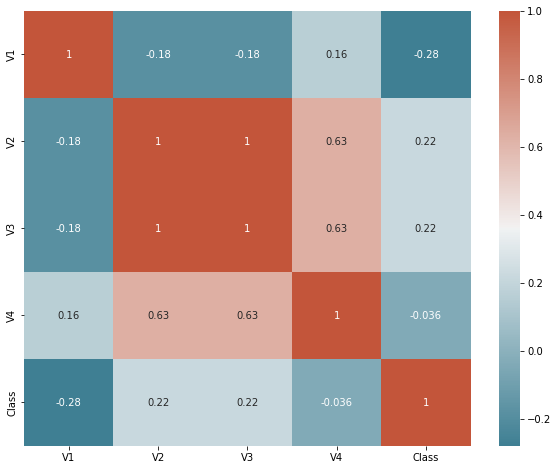

In [4]:
# Exploratory Data Analysis

# Dataframe
display(df)

# Generate descriptive statistics
display(df.describe())

# Concise summary
display(df.info())

# Missing values
print(df.isna().sum())

# Correlation matrix
corr = df.corr()
plt.subplots(figsize=(10,8));
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True));


In [25]:
# Preprocessing

entrada = df.iloc[:, 0:4]
saida = df['Class']

scaler = StandardScaler()
entrada_normalizada = scaler.fit_transform(entrada)

X_train, X_test, y_train, y_true = train_test_split(entrada_normalizada, saida, test_size = 0.35, random_state = 54)

# Models

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


The Accuracy Score is 0.771
The Precision Score is 0.775
The Recall Score is 0.985
The F1 Score is 0.867
The AUC is 0.54


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

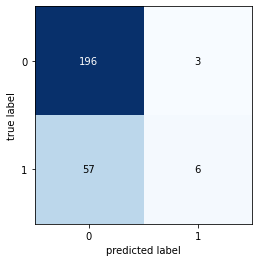

In [26]:
# Metrics

print('The Accuracy Score is', round(accuracy_score(y_true, y_pred), 3))
print('The Precision Score is', round(precision_score(y_true, y_pred), 3))
print('The Recall Score is', round(recall_score(y_true, y_pred), 3))
print('The F1 Score is', round(f1_score(y_true, y_pred), 3))
print('The AUC is', round(roc_auc_score(y_true, y_pred), 3))
cfm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cfm)
